# Python For Finance

This workshop uses the **Investor Exchange API, and the Pandas & Matplotlib** Python libraries.

This workshop is an adaptation of the posts by Gerogios Efstathopoulos and can be found here: https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/

## Quick overview of Python Lists and Dictionaries

Before we dive into Python Pandas, here's a quick review of Lists and Dictionaries which will come in handy.

#### Lists
Lists in Python are a mutable (i.e. can change) fundamental data type, denoted by `[]` and consist of a series of any Python data types such as strings, integers, or even other lists and dictionaries. Items in a list can be repeated.

Lists are indexed starting from 0 which means the first item in say a list called `my_list` can be accessed with `my_list[0]`.

In [105]:
# Create the list
stocks = ['AMZN', 'MSFT', 'TSLA', 'SPCE', 'GOOGL', 'NFLX', 'AAPL', 'AMZN', 'TSLA']

# Display the list
stocks

['AMZN', 'MSFT', 'TSLA', 'SPCE', 'GOOGL', 'NFLX', 'AAPL', 'AMZN', 'TSLA']

In [106]:
stocks.count('TSLA')

2

In [107]:
len(stocks)

9

In [108]:
stocks[0]

'AMZN'

In [109]:
stocks[-1]

'TSLA'

In [110]:
# Add to the stock list
stocks.append('TWTR')

# Display new stock list
stocks

['AMZN',
 'MSFT',
 'TSLA',
 'SPCE',
 'GOOGL',
 'NFLX',
 'AAPL',
 'AMZN',
 'TSLA',
 'TWTR']

In [111]:
stocks.remove('AMZN')

# Display modified stock list
stocks

['MSFT', 'TSLA', 'SPCE', 'GOOGL', 'NFLX', 'AAPL', 'AMZN', 'TSLA', 'TWTR']

In [112]:
stocks.extend(['BABA', 'FB']) # Note this takes in an iterable such as a list to add to an existing list

stocks

['MSFT',
 'TSLA',
 'SPCE',
 'GOOGL',
 'NFLX',
 'AAPL',
 'AMZN',
 'TSLA',
 'TWTR',
 'BABA',
 'FB']

#### Dictionaries
Dictionaries in Python are also a mutable (i.e. can change) fundamental data type, denoted by `{}` and consist of **key:value pairs**. The keys must be unique in a dictionary. 

The main operations on a dictionary are storing a value with some key and extracting the value given the key.

In [113]:
today_stock_prices = {
    "TSLA": 561.25,
    "GOOGL": 1469.52,
    "AMZN": 1860.22
}

# Display the dictionary
today_stock_prices

{'TSLA': 561.25, 'GOOGL': 1469.52, 'AMZN': 1860.22}

In [116]:
today_stock_prices["AMZN"]

1860.22

Performing `list(your_dictionary)` on a dictionary returns a list of all the keys used in the dictionary.

In [117]:
list(today_stock_prices)

['TSLA', 'GOOGL', 'AMZN']

You can create a new key and set it's value or override the value if the key exists:

In [119]:
today_stock_prices["FB"] = 217.77

today_stock_prices

{'TSLA': 561.25, 'GOOGL': 1469.52, 'AMZN': 1860.22, 'FB': 217.77}

In [121]:
today_stock_prices["FB"] = 216.01

today_stock_prices

{'TSLA': 561.25, 'GOOGL': 1469.52, 'AMZN': 1860.22, 'FB': 216.01}

Can also sort by keys (in this case, alphabetically):

In [123]:
sorted(today_stock_prices)

['AMZN', 'FB', 'GOOGL', 'TSLA']

To check whether a single key is in the dictionary, use the `in`keyword.

In [124]:
'FB' in today_stock_prices

True

In [125]:
'MSFT' in today_stock_prices

False

## Introduction to Pandas

The Pandas Library stands for *Python Data Analysis Library* and is an easy-to-use, open source tool for analysing data.

Pandas takes tabular data, like in an Excel/CSV spreadsheet, and creates a Python object consisting of rows and columns called a **dataframe**, which then comes with a handful of useful functions or actions to manipulate that Python object. 

For a short 10min tutorial on Pandas, see https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

We will go through a few key Pandas items here.

#### Using Pandas
By convention we import Pandas, along with another helpful library called Numpy, as follows:

In [3]:
import numpy as np
import pandas as pd

The Pandas library is now accessible to us as the `pd` variable.

Now we create a **DataFrame** consisting of indicies (i.e. the row labels), columns and our data. The syntax for creating a DataFrame is:

`my_data_frame = pd.DataFrame(<your data>, index=<your row labels>, columns = <your column labels>)`

In [33]:
dates = pd.date_range('20200101', periods=6)
dates

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

In [34]:
data = np.random.rand(6,4) # creates a 6 x 4 matrix of random numbers between 0 and 1
data

array([[0.1918526 , 0.8132413 , 0.91522232, 0.3301934 ],
       [0.34353716, 0.47893311, 0.74180112, 0.78941646],
       [0.86307425, 0.56300332, 0.61790132, 0.63926475],
       [0.32324922, 0.99785633, 0.68934976, 0.92108904],
       [0.16398905, 0.39725814, 0.18172516, 0.75492203],
       [0.67543328, 0.33439745, 0.48287354, 0.25996518]])

In [35]:
column_labels = ['A', 'B', 'C', 'D']

In [36]:
df = pd.DataFrame(data, index=dates, columns=column_labels)
df

,A,B,C,D
2020-01-01,0.191853,0.813241,0.915222,0.330193
2020-01-02,0.343537,0.478933,0.741801,0.789416
2020-01-03,0.863074,0.563003,0.617901,0.639265
2020-01-04,0.323249,0.997856,0.689350,0.921089
2020-01-05,0.163989,0.397258,0.181725,0.754922
2020-01-06,0.675433,0.334397,0.482874,0.259965


Now let us look at how we can interact with this dataframe using some built-in methods:

In [37]:
df.head() # Gives us just the top 5 rows of our dataframe by default

,A,B,C,D
2020-01-01,0.191853,0.813241,0.915222,0.330193
2020-01-02,0.343537,0.478933,0.741801,0.789416
2020-01-03,0.863074,0.563003,0.617901,0.639265
2020-01-04,0.323249,0.997856,0.689350,0.921089
2020-01-05,0.163989,0.397258,0.181725,0.754922


In [38]:
df.tail(3) # Gives us the bottom 3 rows of our dataframe since we've specified the number

,A,B,C,D
2020-01-04,0.323249,0.997856,0.689350,0.921089
2020-01-05,0.163989,0.397258,0.181725,0.754922
2020-01-06,0.675433,0.334397,0.482874,0.259965


In [39]:
df.describe() # Gives us a nice summary table of the data

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.426856,0.597448,0.604812,0.615808
std,0.280742,0.257448,0.251519,0.265119
min,0.163989,0.334397,0.181725,0.259965
25%,0.224702,0.417677,0.516630,0.407461
50%,0.333393,0.520968,0.653626,0.697093
75%,0.592459,0.750682,0.728688,0.780793
max,0.863074,0.997856,0.915222,0.921089


In [40]:
df.sort_values(by='B') # Sort by a specific column

,A,B,C,D
2020-01-06,0.675433,0.334397,0.482874,0.259965
2020-01-05,0.163989,0.397258,0.181725,0.754922
2020-01-02,0.343537,0.478933,0.741801,0.789416
2020-01-03,0.863074,0.563003,0.617901,0.639265
2020-01-01,0.191853,0.813241,0.915222,0.330193
2020-01-04,0.323249,0.997856,0.689350,0.921089


In [41]:
df.sum(axis=1) # Sums across the columns. axis=0 will sum across the rows.

2020-01-01    2.250510
2020-01-02    2.353688
2020-01-03    2.683244
2020-01-04    2.931544
2020-01-05    1.497894
2020-01-06    1.752669
Freq: D, dtype: float64

In [64]:
df['B'] # Selects a single column

2020-01-01    0.225751
2020-01-02    0.388214
2020-01-03    0.181905
2020-01-04    0.146339
2020-01-05    0.037712
2020-01-06    0.532403
Freq: D, Name: B, dtype: float64

In [67]:
df.loc['2020-01-05'] # Selects a specific row by label

A    0.764690
B    0.037712
C    0.940726
D    0.283655
Name: 2020-01-05 00:00:00, dtype: float64

In [68]:
df[1:4] # Slices the dataframe by rows using default index values. Note the last index number in the selected range is excluded.

,A,B,C,D
2020-01-02,0.409278,0.388214,0.555354,0.598860
2020-01-03,0.868087,0.181905,0.554925,0.919464
2020-01-04,0.185932,0.146339,0.390769,0.558661


In [69]:
df[df['A'] > 0.5] # Boolean indexing based on a condition. df.A refers to column A

,A,B,C,D
2020-01-01,0.638612,0.225751,0.846840,0.580116
2020-01-03,0.868087,0.181905,0.554925,0.919464
2020-01-05,0.764690,0.037712,0.940726,0.283655


In [71]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2020-01-01,0.638612,0.225751,0.846840,0.580116,one
2020-01-02,0.409278,0.388214,0.555354,0.598860,one
2020-01-03,0.868087,0.181905,0.554925,0.919464,two
2020-01-04,0.185932,0.146339,0.390769,0.558661,three
2020-01-05,0.764690,0.037712,0.940726,0.283655,four
2020-01-06,0.209547,0.532403,0.236261,0.407510,three


Now let us look at a basic Python plotting library to create charts from our data. **Matplotlib** is an easy-to-use but powerful plotting library.

## Introduction to Matplotlib

For a detailed tutorial on Matplotlib, see: https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

Here are some examples of the basics with Matplotlib:

By convention, we import Matplotlib as follows:

In [2]:
import matplotlib.pyplot as plt

The `plt` object has a `plot()` method which uses the convention: `plt.plot(<x-axis data>, <y-axis data>, <plot style>)`.

 If you provide a single list or array to the `plot()` command, matplotlib assumes it is a sequence of y values, and automatically generates the x values for you, starting with 0.
 
 So for example:

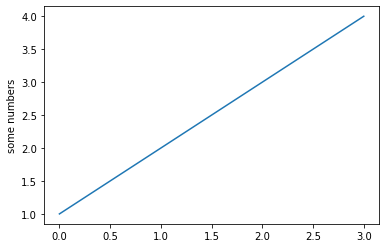

In [19]:
plt.plot([1, 2, 3, 4]) # No x-axis data here, only y-axis
plt.ylabel('some numbers')
plt.show() # This actually displays the plot

For every x, y pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot. The default format string is 'b-', which is a solid blue line. For example, to plot the above with red circles, you would issue `'ro'`

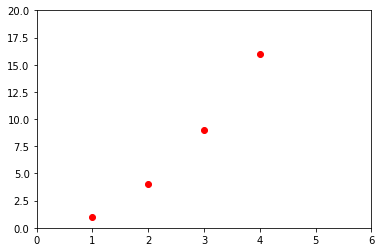

In [20]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

Text(0.5, 0.98, 'My beautiful graph')

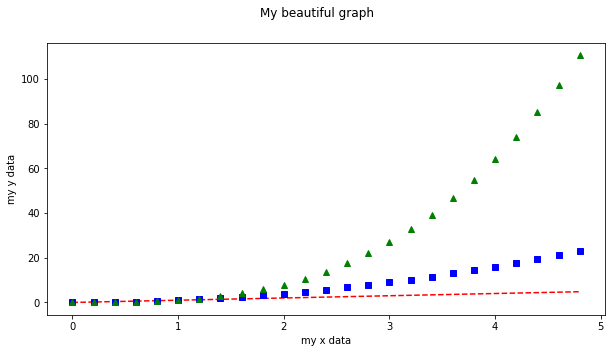

In [27]:
t = np.array([0.,0.2,0.4,0.6,0.8,1.,1.2,1.4,1.6,1.8,2.,2.2,2.4,2.6,2.8,3.,3.2,3.4,3.6,3.8,4.,4.2,4.4,4.6,4.8])

plt.figure(figsize=(10, 5))
plt.plot(t,t,'r--')
plt.plot(t,t**2, 'bs')
plt.plot(t,t**3, 'g^')
plt.xlabel('my x data')
plt.ylabel('my y data')
plt.suptitle('My beautiful graph')

## Analysing Stock Ticker Data

Now that we have some of the Python data manipulation and plotting fundamentals down, let us start to analyze timeseries financial data.

### Setting up Investor Exchange Account
Investors Exchange (IEX) at https://iexcloud.io/ offers a free web-based API to access financial data such as historical and current stock ticker information. You will need to setup an account (which requires an email validation) in order to obtain an API Key which we will use in our Python code.

Sign-up Process:
* When you sign-up, you will receive an email with the subject `IEX Cloud Email Verification`
* Verify your email and then click on the link provided under: `To get access to your API keys, go to the link below` . This will log you back into the IEX console.
* Then in the left-hand menu, click on `API Tokens`
* Your API token will be the `Publishable` type

### Python Requirements

In addition to `pandas` and `matplotlib` packages, we will need to install the following Python package: 
* pandas-datareader

In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


### Pulling in stock ticker data
First, we import the following packages:

In [4]:
from pandas import DataFrame
from pandas_datareader import data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

Then we will set our IEX API KEY to the environment variable "IEX_API_KEY".

Copy your API Token public key from the IEX console and paste it as follows:

In [5]:
os.environ["IEX_API_KEY"] = "pk_b27ac22c66ed40f9b172212374c803d7"

Now, let's create a small **list of tickers** that we want to analyze. We can scale up with more stocks but we will start with just 3 for now to keep our data requests from IEX low. 

A full list of eligible stock tickers can be found here: https://iextrading.com/trading/eligible-symbols/

We will pull and look at data for the following 3 Exchange Traded Funds (ETF) stock tickers representing different industry sectors:

IAU - Gold Trust
IXG - Global Financials
IXN - Global Tech

We can pull data from as far back as 5 years ago with our account. However, let us start by looking at stock ticker data since the beginning of 2017. 

In [6]:
tickers = ['IAU', 'IXG', 'IXN']

start_date = '2017-01-01'
end_date = '2020-01-01'

Now we pull in the ticker data with pandas's `datareader` with:

In [7]:
stock_data = data.DataReader(tickers, 'iex', start_date, end_date)

And now let us call the `stock_data` variable to see the data it holds:

In [9]:
stock_data

Attributes   open                  high                   low                 \
Symbols       IAU    IXG     IXN    IAU    IXG     IXN    IAU    IXG     IXN   
date                                                                           
2017-01-03  11.09  58.43  110.60  11.22  58.76  111.25  11.05  58.23  110.18   
2017-01-04  11.23  58.82  110.88  11.24  59.32  111.36  11.18  58.82  110.88   
2017-01-05  11.33  59.21  111.40  11.42  59.32  111.80  11.33  58.91  111.39   
2017-01-06  11.30  59.18  111.83  11.36  59.32  112.78  11.27  59.11  111.49   
2017-01-09  11.35  58.95  112.59  11.42  59.00  113.12  11.34  58.66  112.59   
...           ...    ...     ...    ...    ...     ...    ...    ...     ...   
2019-12-24  14.25  68.53  209.42  14.34  68.53  209.42  14.25  68.40  208.72   
2019-12-26  14.41  68.56  209.81  14.46  68.88  210.80  14.40  68.52  209.81   
2019-12-27  14.44  69.06  211.85  14.49  69.06  211.85  14.43  68.83  210.72   
2019-12-30  14.47  69.07  211.01  14.49  69.07  211.01  14.46  68.54  208.47   
2019-12-31  14.55  68.77  209.11  14.58  68.77  210.62  14.49  68.49  209.11   

Attributes  close                   volume                 
Symbols       IAU    IXG     IXN       IAU     IXG    IXN  
date                                                       
2017-01-03  11.16  58.56  110.76   7937709  157301  80558  
2017-01-04  11.21  59.32  111.21   8860361   94741  20009  
2017-01-05  11.38  59.15  111.77  14333931   47266  41994  
2017-01-06  11.30  59.21  112.58  10424990   14085  38068  
2017-01-09  11.38  58.77  112.93   6615967   68358  33283  
...           ...    ...     ...       ...     ...    ...  
2019-12-24  14.33  68.40  209.11   5428963   25055  30179  
2019-12-26  14.45  68.85  210.80   7138485   13732  30416  
2019-12-27  14.44  68.86  211.18   7083072  107631  56752  
2019-12-30  14.49  68.62  209.61  13269927   19538  49660  
2019-12-31  14.50  68.75  210.49  14298022   59101  52928  

[754 rows x 15 columns]

In [10]:
type(stock_data)

pandas.core.frame.DataFrame

We see that the data retrieved from IEX is a DataFrame.
We see we have daily information of the `open`, `high`, `low`, `close`, and `volume` of our selected tickers in each row. 

The index of each row is the date which you can access using the `loc` method:

In [11]:
stock_data.loc['2017-01-03']

Attributes  Symbols
open        IAU             11.09
            IXG             58.43
            IXN            110.60
high        IAU             11.22
            IXG             58.76
            IXN            111.25
low         IAU             11.05
            IXG             58.23
            IXN            110.18
close       IAU             11.16
            IXG             58.56
            IXN            110.76
volume      IAU        7937709.00
            IXG         157301.00
            IXN          80558.00
Name: 2017-01-03, dtype: float64

### Plot stock data
Let us plot only the stock price at the daily **close** for each of our 3 tickers. We will use the `matplotlib` library for creating and viewing the plots.

First, create the `close_price` object:

In [12]:
close_price = stock_data['close']

In [13]:
close_price.describe()

Symbols,IAU,IXG,IXN
count,754.000000,754.000000,754.000000
mean,12.539377,64.786963,158.993289
std,0.840562,3.769483,21.989077
min,11.160000,54.200000,110.760000
25%,11.960000,61.860000,142.227500
50%,12.350000,64.460000,161.515000
75%,12.770000,67.327500,173.587500
max,14.880000,75.990000,211.180000


Recall that the `index` refers to the row labels in our DataFrame. We can get this list of row labels as follows:

In [15]:
close_price.index

Index(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06', '2017-01-09',
       '2017-01-10', '2017-01-11', '2017-01-12', '2017-01-13', '2017-01-17',
       ...
       '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
       '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31'],
      dtype='object', name='date', length=754)

Now, let us plot the `close_price` for each of our 3 ETFs using the `matplotlib` library, imported as `plt`:

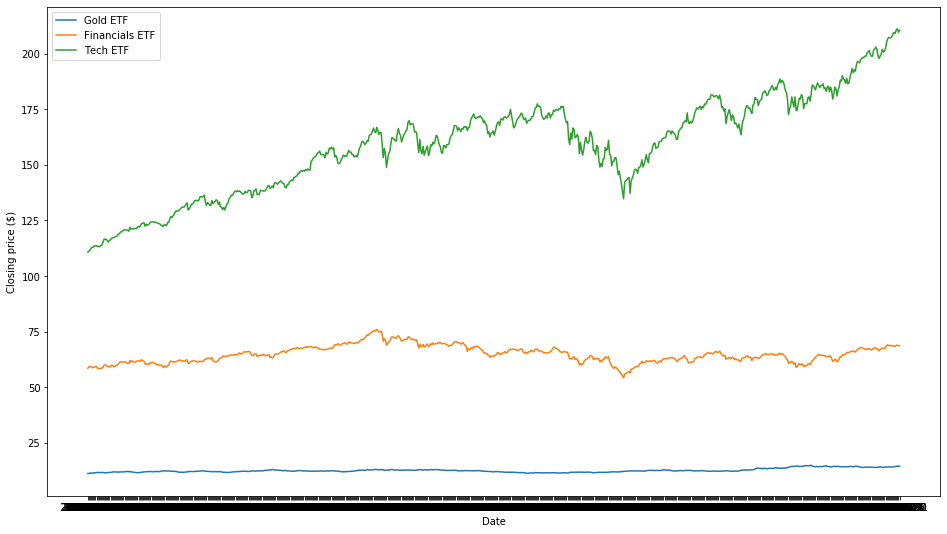

In [16]:
# Set our Figure size
plt.figure(figsize=(16, 9))

# Plot our data series with plt.plot(<x-axis>, <y-axis>, <label>)
plt.plot(close_price.index, close_price['IAU'], label='Gold ETF')
plt.plot(close_price.index, close_price['IXG'], label='Financials ETF')
plt.plot(close_price.index, close_price['IXN'], label='Tech ETF')

# Label our plots & add a legend
plt.xlabel('Date')
plt.ylabel('Closing price ($)')
plt.legend()

# Display our plot
plt.show()

So we see the Tech ETF timeseries, consisting of the daily close price, growing faster than the other 2 ETFs. However, this data can be quite noisy day-to-day. One way to try and smooth the curves out is by looking at a **moving average** of the daily close price. 

### Moving averages

A useful timeseries to look at is the simple moving average of the stock time-series data over a **short** and **long** window. The moving average is just the rolling price average of the past X days and pandas has a built-in `rolling()` function. For a short window, we will use 20 days and for a long window, 100 days. 

Note: creating a moving average means that for a window of $X$ units, the **first $X-1$** units are not valid. For example, if $X = 20\ days$, the data of the first 19 days is used to calculated the average for day 20. Day 21 is calculated using the prices from Day 2 to Day 21.

The reason for introducing the concept of moving averages is that there are trading strategies based on the behaviour of moving averages of differet windows. 

We will do this first for just one of the tickers. Let us use `IXN` global tech ETF ticker:

In [20]:
# Select only the IXN column
ixn_close_price = close_price['IXN']

# Calculate the short (20 day) window moving average timeseries
short_window_ixn = ixn_close_price.rolling(window=20).mean()

# Calculate the long (100 day) window moving average timeseries
long_window_ixn = 

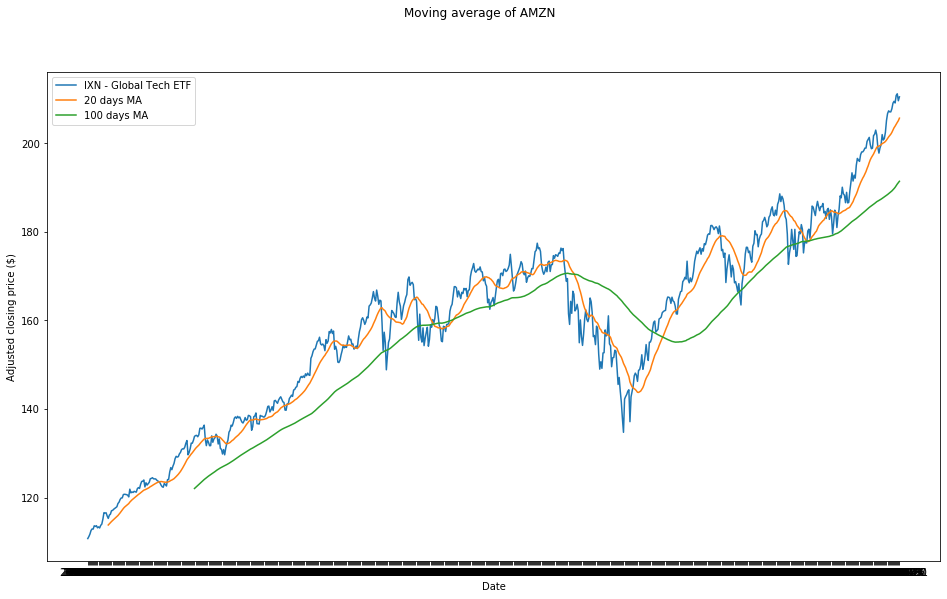

In [18]:
# Now we plot the data

# First, set the figure size
plt.figure(figsize=(16, 9))

# Plot our data series with plt.plot(<x-axis>, <y-axis>, <label>)

# First, plot the daily IXN close price
plt.plot(ixn_close_price.index, ixn_close_price, label='IXN - Global Tech ETF')
# Now plot the IXN short window moving average
plt.plot(..., label='20 days MA')
# Now plot the IXN long window moving average
plt.plot(..., label='100 days MA')

# Label our plots & add a legend
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.suptitle('Moving average of AMZN')
plt.legend()

# Display our plot
plt.show()

* Why do the short-window and long-window curves start later on the graph?
* If you had to create a simple trading strategy based on the moving averages, when would you buy and when would you sell?

* What do the graphs look like for our other 2 stock tickers?

* For an interesting read on which moving average lines are popular and why, check out: https://www.investopedia.com/ask/answers/122414/what-are-most-common-periods-used-creating-moving-average-ma-lines.asp

Next, we will take a look at a few simple but realistic quantitative trading strategies using Python pandas and the methods discussed above.

## Calculating returns

We will use pandas to **calculate the returns** of our selected stocks. 

Just looking at the timeseries of price information has some drawbacks: 
* The price of a stock is only positive and so it gets messy if we use mathematical models and approaches which require or use negative numbers
* Also, looking at price numbers over a long period of time results in statistical properties which are less stable. For example, note the huge standard deviations in the following:

In [21]:
close_price.describe()

Symbols,IAU,IXG,IXN
count,754.000000,754.000000,754.000000
mean,12.539377,64.786963,158.993289
std,0.840562,3.769483,21.989077
min,11.160000,54.200000,110.760000
25%,11.960000,61.860000,142.227500
50%,12.350000,64.460000,161.515000
75%,12.770000,67.327500,173.587500
max,14.880000,75.990000,211.180000


An alternative approach is to look at the **timeseries of the changes or delta in the daily close price** instead of the timeseries of the price itself. 

The most common delta timeseries used is:

We have the **relative return**:
> $relative \_return(today) = \frac{price(today) - price(today-1)} {price(today-1)}$

which is simply the percent return over an incremental period of time such as a day.

> **Note: this is a simplified version of the process of calculating `relative_returns`. For the correct and more detailed process, see the full version notes of this workshop!**


Relative returns can easily be calculated with pandas:

In [22]:
relative_returns = close_price.pct_change(1)

In [23]:
# Let's look at the first few rows of our `relative_returns` DataFrame:
relative_returns.head()

Symbols,IAU,IXG,IXN
date,,,
2017-01-03,NaN,NaN,NaN
2017-01-04,0.004480,0.012978,0.004063
2017-01-05,0.015165,-0.002866,0.005036
2017-01-06,-0.007030,0.001014,0.007247
2017-01-09,0.007080,-0.007431,0.003109


The values in each cell represent the daily percent gain or loss from the previous day (note - need to multiply by 100 to actually get the percent number)

Now instead of the individual daily returns, we want to keep a running total, or a cumulative sum, of our returns. So for example on `2017-01-09`, we want to know our total return since `2017-01-03`. 

With pandas, the cumulative sum is calculated by using the `cumsum()` method: 

In [26]:
cumulative_returns = relative_returns.cumsum()

And let us see the bottom few rows of this cumulative returns DataFrame:

In [27]:
cumulative_returns.tail()

Symbols,IAU,IXG,IXN
date,,,
2019-12-24,0.266390,0.183901,0.684878
2019-12-26,0.274764,0.190480,0.692959
2019-12-27,0.274072,0.190625,0.694762
2019-12-30,0.277535,0.187140,0.687328
2019-12-31,0.278225,0.189035,0.691526


So now, we can see a timeseries of our total return for each stock on a daily basis! The above table shows us that the cumulative returns for *IXN - Global Tech ETF* is nearly 70% by Dec 31, 2019 and significantly higher than the Gold and Financial ETFs!

Now, what if instead of the cumulative returns of each stock/ETF in our portfolio separately, we want to get the total cumulative returns? We can simply sum up across all our columns using the `sum(axis=1)` method on DataFrames mentioned before:

In [29]:
cumulative_returns_portfolio = cumulative_returns.sum(axis=1)
cumulative_returns_portfolio.tail()

date
2019-12-24    1.135169
2019-12-26    1.158204
2019-12-27    1.159460
2019-12-30    1.152003
2019-12-31    1.158785
dtype: float64

So the total cumulative return of our portfolio (adding across IAU, IXG and IXN) is 115.8% on Dec 31, 2019.

Now let us plot this total cumulative return timeseries:

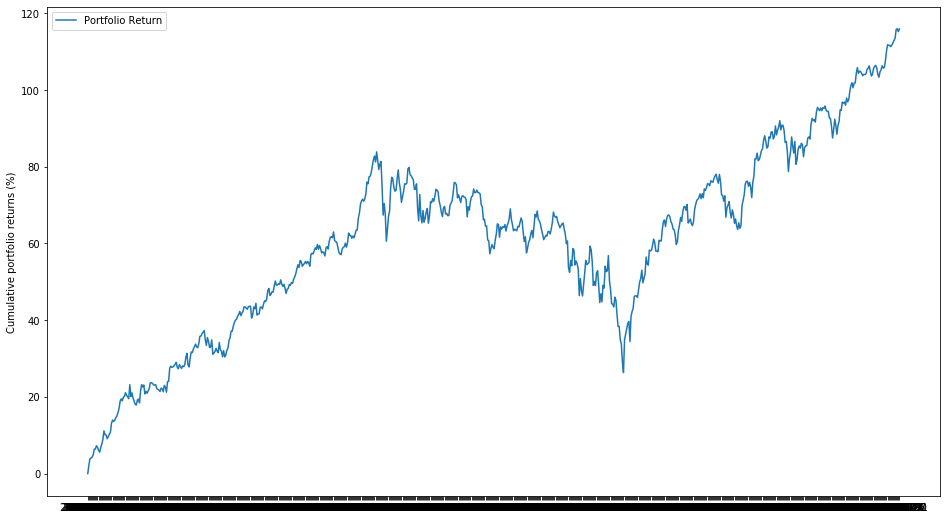

In [36]:
# First, set the figure size
plt.figure(figsize=(16, 9))

# Plot our data series with plt.plot(<x-axis>, <y-axis>, <label>)
plt.plot(cumulative_returns_portfolio.index, 100*cumulative_returns_portfolio, label="Portfolio Return")

# Label our plots & add a legend
plt.ylabel('Cumulative portfolio returns (%)')
plt.legend()

# Display our plot
plt.show()

Now we have the ability to dissect any stock price ticker into its daily returns and then calculate the **cumulative** return for the entire portfolio over a defined time period!

### Apply Moving Averages on Cumulative Returns Timeseries

Now that we have our plot of the daily cumulative returns of our portfolio, let us determine the short (20 day) window Moving Average and long (100 day) window Moving average to see if those curves indicate any trends containing buy/sell signals.

First, we calculate the moving averages:

In [34]:
short_window_portfolio = cumulative_returns_portfolio.rolling(window=20).mean()
long_window_portfolio = cumulative_returns_portfolio.rolling(window=100).mean()

Then we add the plots of these timeseries to the cumulative returns plot from before:

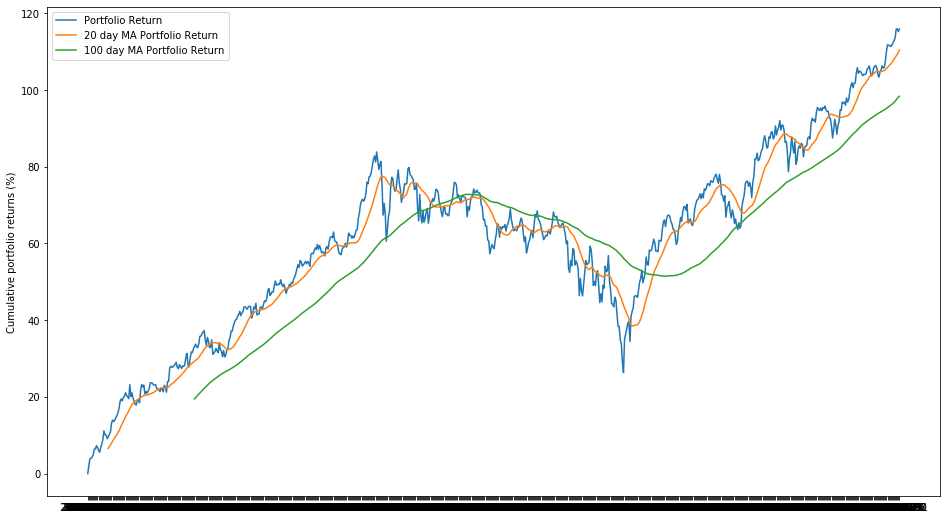

In [37]:
# First, set the figure size
plt.figure(figsize=(16, 9))

# Plot our data series with plt.plot(<x-axis>, <y-axis>, <label>)
plt.plot(cumulative_returns_portfolio.index, 100*cumulative_returns_portfolio, label="Portfolio Return")
plt.plot(short_window_portfolio.index, 100*short_window_portfolio, label="20 day MA Portfolio Return")
plt.plot(long_window_portfolio.index, 100*long_window_portfolio, label="100 day MA Portfolio Return")

# Label our plots & add a legend
plt.ylabel('Cumulative portfolio returns (%)')
plt.legend()

# Display our plot
plt.show()

Now, how do we actually identify the exact times where the 20 day moving average crosses the 100 day moving average? 

Well, if we take the difference of the `short_window_portfolio` and `long_window_portfolio` series, then the first time this difference series is less than 0 is our first intersection point! And similarly, the last timestamp in this difference series is when the `short_window_portfolio` curve goes back above the `long_window_portfolio`. 

To calculate the difference, simply do:

In [71]:
short_long_diff = short_window_portfolio - long_window_portfolio

Then, we filter the `short_long_diff` series for values less than 0:

In [73]:
intersections = short_long_diff[short_long_diff < 0]
intersections

date
2018-04-16   -0.002248
2018-04-17   -0.003803
2018-04-18   -0.005257
2018-04-19   -0.007497
2018-04-20   -0.007466
                ...   
2019-01-29   -0.048047
2019-01-30   -0.037960
2019-01-31   -0.028333
2019-02-01   -0.016151
2019-02-04   -0.006677
Length: 203, dtype: float64

So, the first date of the intersection is `2018-04-16` and the last date is `2019-02-04`!

So if we sold our portfolio on `2018-04-16`, the cumulative return on that date would be:

In [74]:
cumulative_returns_portfolio.loc['2018-04-16']

0.7221530728421649

Q) what would be our current portfolio return to Dec 31, 2019 (the last date of our stock data) if we bought back in on `2019-02-04` when the short-window moving average curve crossed the long-window MA going upwards?

In [75]:
cumulative_returns_portfolio.loc['2019-12-31'] - cumulative_returns_portfolio.loc['2019-02-04']

0.5635050972891688

## Defining a Weights Trading Strategy

In defining a weights trading strategy, we want to derive a set of weights which we will apply to different assets in our portfolio and compare returns over a period of time. So given a certain amount of dollars $N$ we have $w_1(t)$ and $w_2(t)$ where the sum of those two is less than or equal to 1. 

For example, assume we can invest in 2 assets only and that $N=\$1000$. If $w_1(t)=0.4$ and $w_2(t)=0.6$, this means that we have invested $w_1(t)N=\$400$ in asset 1 and $w_2(t)N=\$600$ in asset 2. 

Note - We won't go into short selling here but you can also have negative weights representing **short positions**. 

### Equal Weights Strategy
Let us look at how to calculate the return of our trading strategy for using **equal weights**.

First, let us look at just a single day, the last day, of our *relative_returns* timeseries separated by individual tickers:

In [76]:
last_day = relative_returns.tail(1)
last_day

Symbols,IAU,IXG,IXN
date,,,
2019-12-31,0.00069,0.001894,0.004198


This gives us back just a single row, or vector. 

Now, we will create an **equal weights** vector for all 3 stocks (i.e. a weighting of $1/3$) using the same index and columns as our `last_day` vector:

In [87]:
equal_weights_list = [1/3, 1/3, 1/3]

In [88]:
weights_vector = pd.DataFrame([equal_weights_list], index=last_day.index, columns=last_day.columns)
weights_vector

Symbols,IAU,IXG,IXN
date,,,
2019-12-31,0.333333,0.333333,0.333333


Now, we want to **multiply** the weight of each stock times the `last_day` return for that stock to determine how much we would actually get for a single day with this equal weight trading strategy. In order to do this multiplication we simply do:

In [82]:
weights_vector*last_day

Symbols,IAU,IXG,IXN
date,,,
2019-12-31,0.00023,0.000631,0.001399


And if we want the sum across all stocks, just sum up across all the columns like before with `sum(axis=1)`

In [89]:
(weights_vector*last_day).sum(axis=1)

date
2019-12-31    0.002261
dtype: float64

So this is the portfolio return on a single day, from the previous day, using our $1/3$ weighting strategy for the 3 specific stocks we have picked. 

**Now, let us do this for the entire period between our start and end dates:**

In [90]:
equal_weights = pd.DataFrame([equal_weights_list], index=relative_returns.index, columns=relative_returns.columns)
equal_strategy_relative_returns = (equal_weights*relative_returns).sum(axis=1)

# Let's look at the last few rows:
equal_strategy_relative_returns.tail()

date
2019-12-24    0.002122
2019-12-26    0.007678
2019-12-27    0.000419
2019-12-30   -0.002486
2019-12-31    0.002261
dtype: float64

And now we calculate the cumulative return for the entire timeseries using this strategy:

In [91]:
cumulative_equal_weights_returns = equal_strategy_relative_returns.cumsum()

# Let's look at the last few rows:
cumulative_equal_weights_returns.tail()

date
2019-12-24    0.378390
2019-12-26    0.386068
2019-12-27    0.386487
2019-12-30    0.384001
2019-12-31    0.386262
dtype: float64

So with an equal weighting strategy on our ETF stocks: IAU, IXG, IXN, we get a 38.6% return by Dec 31, 2019.

Now what about a custom weights strategy?

### Equal vs. Custom Weights Strategy
Let us look at how to calculate the return of our trading strategy for using custom weights and then plot and compare the two. 

Let's say we are friends with Jeff Bezos so we invest more with the Tech ETF - IXN. So say now our custom_weights_list is defined as:

In [93]:
custom_weights_list = [1/5, 1/5, 3/5]

And so our custom_weights DataFrame is created with: 

In [95]:
custom_weights = pd.DataFrame([custom_weights_list], index=relative_returns.index, columns=relative_returns.columns)

Which looks like:

In [97]:
custom_weights.head()

Symbols,IAU,IXG,IXN
date,,,
2017-01-03,0.2,0.2,0.6
2017-01-04,0.2,0.2,0.6
2017-01-05,0.2,0.2,0.6
2017-01-06,0.2,0.2,0.6
2017-01-09,0.2,0.2,0.6


Then, we calculate our weighted relative returns and use the `cumsum()` function to get the cumulative returns series:

In [99]:
# First our custom strategy relative returns, added across our columns
custom_strategy_relative_returns =(custom_weights*relative_returns).sum(axis=1)

# Then, calculate our cumulative sum
cumulative_custom_weights_returns = custom_strategy_relative_returns.cumsum()

# Let's see our bottom few rows of this series:
cumulative_custom_weights_returns.tail()

date
2019-12-24    0.500985
2019-12-26    0.508825
2019-12-27    0.509797
2019-12-30    0.505332
2019-12-31    0.508367
dtype: float64

Let us now plot the equal weights and custom weights relative_returns series to compare performance:

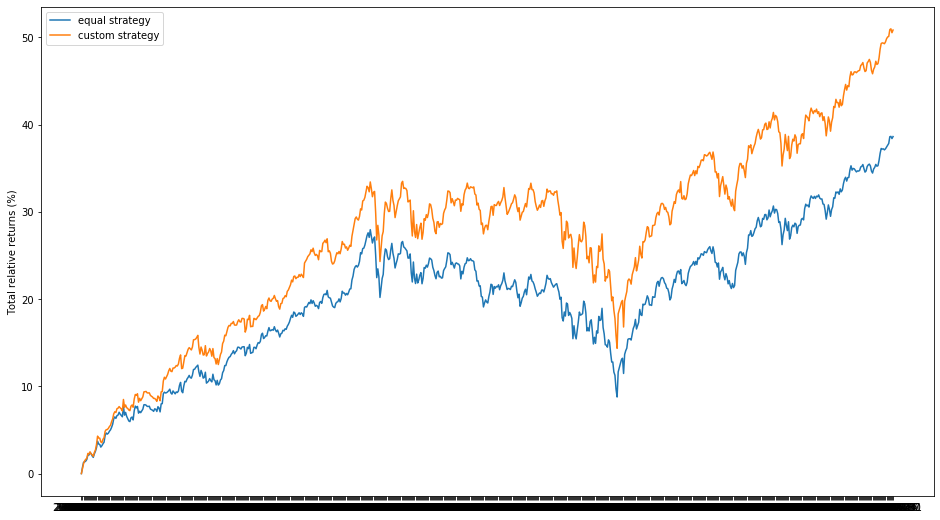

In [100]:
# First, set the figure size
plt.figure(figsize=(16, 9))

# Plot our data series with plt.plot(<x-axis>, <y-axis>, <label>)
plt.plot(cumulative_equal_weights_returns.index, 100*cumulative_equal_weights_returns, label='equal strategy')
plt.plot(cumulative_custom_weights_returns.index, 100*cumulative_custom_weights_returns, label='custom strategy')

# Add our plot labels and legend
plt.ylabel('Total relative returns (%)')
plt.legend()

# Display our plot
plt.show()

So we see that over the course of our selected time period, the custom (Tech-heavy) strategy tends to perform better overall.

Let us write a quick function to calculate and print out some basic yearly statistics:

In [101]:
def print_portfolio_yearly_statistics(portfolio_cumulative_relative_returns, days_per_year = 52 * 5):

    total_days_in_simulation = portfolio_cumulative_relative_returns.shape[0]
    number_of_years = total_days_in_simulation / days_per_year

    # The last data point will give us the total portfolio return
    total_portfolio_return = portfolio_cumulative_relative_returns[-1]
    
    # Average portfolio return assuming compunding of returns
    average_yearly_return = (1 + total_portfolio_return)**(1/number_of_years) - 1

    print('Total portfolio return is: ' + '{:5.2f}'.format(100*total_portfolio_return) + '%')
    print('Average yearly return is: ' + '{:5.2f}'.format(100*average_yearly_return) + '%')

First our equal weights strategy statistics:

In [102]:
print_portfolio_yearly_statistics(cumulative_equal_weights_returns)

Total portfolio return is: 38.63%
Average yearly return is: 11.92%


In [103]:
print_portfolio_yearly_statistics(cumulative_custom_weights_returns)

Total portfolio return is: 50.84%
Average yearly return is: 15.23%


### Exercise

You have the following 5 ETF stock tickers for their corresponding sectors:
* IAU - Gold Trust
* IXC - Global Energy
* IXG - Global Financials
* IXJ - Global Healthcare
* IXN - Global Tech

> Come up with best weightings using at least 2 of these 5 ETFs which produce the greatest average yearly returns since Jan 1, 2016.